In [71]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Классификация доходов

# 0.Описать задачу словами

Основная цель данной задачи состоит в том, чтобы классифицировать людей, зарабатывающих <=50 тысяч или >50 тысяч долларов, на основе нескольких объясняющих факторов, влияющих на доход человека, таких как возраст, профессия, образование и т. д.

# 1.Загружаем данные

In [72]:
url = "D:\income_evaluation.csv"
data_raw = pd.read_csv(url)

In [73]:
type(data_raw) 

pandas.core.frame.DataFrame

Посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [74]:
data_raw.shape

(32561, 15)

Посмотрим весь наш набор данных:

In [75]:
data_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Первые строки таблицы:

In [76]:
data_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Последние строки таблицы:

In [77]:
data_raw.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Таблица содержит данные о более 32 тысячах людей с указанием их годового дохода. Для каждого человека указан: его возраст,рабочий класс, образование, семейное положение, род занятий,отношения,раса, пол,прирост капитала, потеря капитала, количество рабочих часов в неделю,родная страна,доход.



Имена столбцов:

In [78]:
data_raw.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

Имена строк (совпадают с номерами):

In [79]:
data_raw.index

RangeIndex(start=0, stop=32561, step=1)

Столбцы (признаки) имеют следующие имена:

- `Age` - возраст человека
- `Workclass` - рабочий класс(тип работодателя.  Будь то правительственные, военные, частные и т. д.)
- `Fnlwgt` – количество людей, которое, по мнению переписчиков, представляет собой наблюдение (окончательный вес)
- `Education` - наивысший уровень образования, достигнутый этим человеком
- `Education-num` - высший уровень образования в числовой форме (количество законченных классов)
- `Marital-status` - семейное положение человека
- `Occupation` - род занятий человека
- `Relationship` - содержит такие значения семейных отношений, как муж, отец и т. д., но только по одному на каждое наблюдение.
- `Race` - описание индивидуальной расы. (Черный, белый и т. д.)
- `Sex` - биологический пол
- `Capital-gain` - зарегистрированный прирост капитала (доход от инвестиционных источников, кроме заработной платы / оклада)
- `Capital-loss` - зарегистрированные капитальные убытки (убытки от источников инвестиций, кроме заработной платы / оклада)
- `Hours-per-week` - количество отработанных часов в неделю
- `Native country` - страна происхождения человека
- `Income` - составляет ли годовой доход человека <= 50 или >50 тыс. долларов.

Признаки `Workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`,`native country` - номинальные (категориальные); `Sex`, `income` - бинарные, а остальные признаки  - количественные(числовые).

# 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). 

Получим сводную информацию о признаках:

In [81]:
data_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. По данным характеристикам заметна следующая особенность нашего набора данных. Если сравнить среднее значение и медиану, видно какие значения преобладают в выборке. Если среднее значение больше, чем медиана, значит данный признак принимает чаще меньшие значения, чем большие.

Проверим взаимосвязь между переменными:

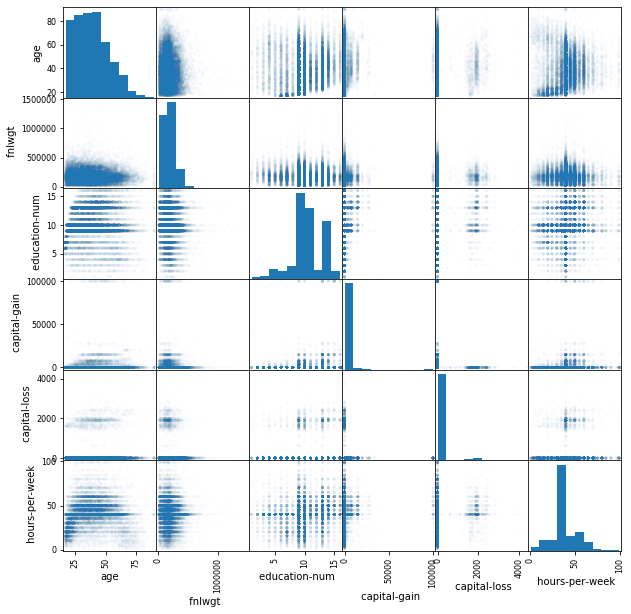

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

In [83]:
data_raw.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Коэффициент кореляции меняется от -1 до 1. Так как у нас нет значений по мудулю близких к 1, значит у нас нет зависимостей близких к линейной. Положительный коээфициент кореляции характеризует линейную зависимость с положительным коэффициентом (т.е чем больше Х, тем больше У). Отрицательный коэффициент наоборот, чем меньше Х, тем меньше У.

Посмотрим зависимость количества отработанных часов от возраста:

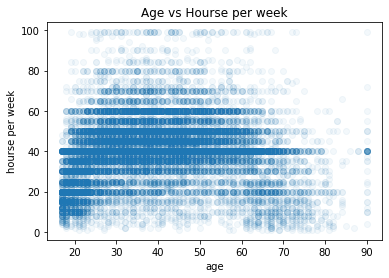

In [85]:
plt.plot(data_raw['age'], data_raw[' hours-per-week'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('hourse per week')
plt.title('Age vs Hourse per week')
pass

In [87]:
data_raw[' income'] == ' <=50K'

0         True
1         True
2         True
3         True
4         True
         ...  
32556     True
32557    False
32558     True
32559     True
32560    False
Name:  income, Length: 32561, dtype: bool

Посмотрим зависимость уровня дохода от количества законченных классов и возраста:

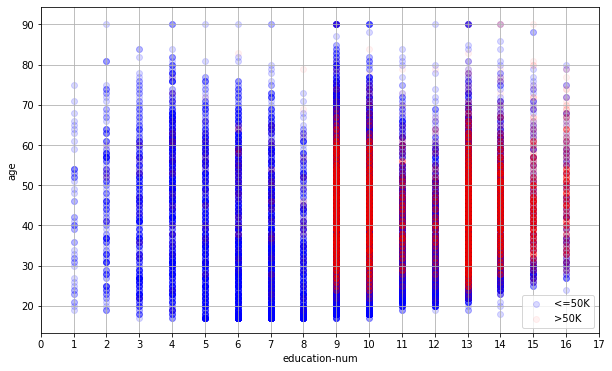

In [90]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw[' income'] == ' <=50K'][' education-num'],
            data_raw[data_raw[' income'] == ' <=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data_raw[data_raw[' income'] == ' >50K'][' education-num'],
            data_raw[data_raw[' income'] == ' >50K']['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('education-num')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
plt.grid()

Проанализируем зависимость возраста людей по количеству законченных классов:

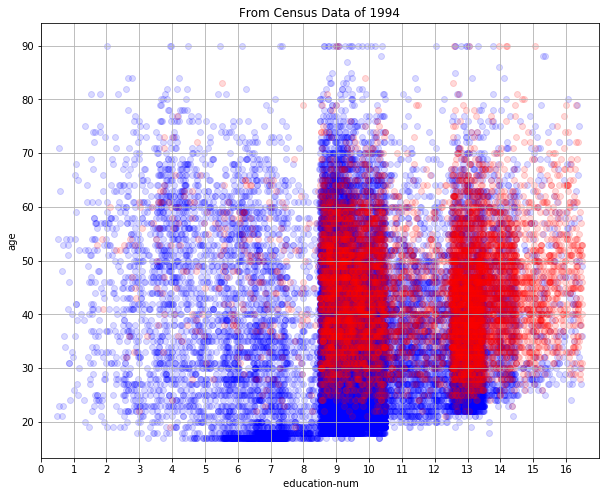

In [105]:
np.random.seed(0)
education_num_rnd = data_raw[' education-num'] + np.random.rand(data_raw.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data_raw[' income'] == ' <=50K'],
            data_raw[data_raw[' income'] == ' <=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(education_num_rnd[data_raw[' income'] == ' >50K'],
            data_raw[data_raw[' income'] == ' >50K']['age'],
            alpha = 0.15,
            label = ' >50K',
            color = 'r')

plt.xlabel(' education-num')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('From Census Data of 1994')
plt.grid()

По представленному графику зависимости видно следующее:большинство людей заканчивало 9,10,13 классов.

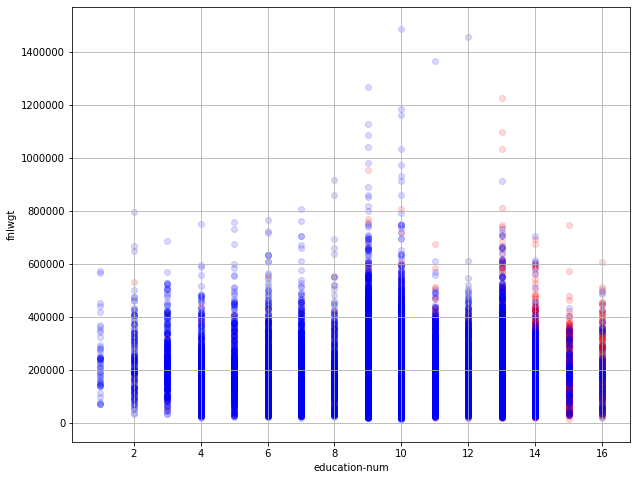

In [109]:
plt.figure(figsize = (10, 8))

plt.scatter(data_raw[data_raw[' income'] == ' >50K'][' education-num'],
            data_raw[data_raw[' income'] == ' >50K'][' fnlwgt'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.scatter(data_raw[data_raw[' income'] == ' <=50K'][' education-num'],
            data_raw[data_raw[' income'] == ' <=50K'][' fnlwgt'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.xlabel('education-num')
plt.ylabel('fnlwgt')
plt.grid()

Посмотрим на категориальные и количественные признаки:

In [110]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']
['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


In [111]:
for c in categorical_columns:
    print(c, data_raw[c].unique())

 workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 sex [' Male' ' Female']
 native-country [' United-States' ' Cuba' ' Jamaica' ' 

# 3. Обработать пропущенные значения (или убедиться, что их нет)

Найдём медиану по каждому признаку:

In [112]:
data_raw.median(axis = 0)

age                    37.0
 fnlwgt            178356.0
 education-num         10.0
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week        40.0
dtype: float64

Заменим пропущенные значения на медианы:

In [113]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)

In [114]:
data_raw[numerical_columns].count(axis = 0)

age                32561
 fnlwgt            32561
 education-num     32561
 capital-gain      32561
 capital-loss      32561
 hours-per-week    32561
dtype: int64

In [115]:
data_raw[categorical_columns].count(axis = 0)

 workclass         32561
 education         32561
 marital-status    32561
 occupation        32561
 relationship      32561
 race              32561
 sex               32561
 native-country    32561
 income            32561
dtype: int64

In [117]:
data_raw[' workclass'].describe()

count        32561
unique           9
top        Private
freq         22696
Name:  workclass, dtype: object

In [135]:
data_raw.loc[data_raw[' workclass'] == "?",' workclass'] = None

In [136]:
data_raw.describe(include = [object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [138]:
type(data_raw[' workclass'].describe())

pandas.core.series.Series

In [139]:
data_raw[' workclass'].describe().top

' Private'

In [141]:
data_raw[' workclass'] = data_raw[' workclass'].fillna('Private')

In [142]:
data_raw.describe(include = [object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [145]:
data_describe = data_raw.describe(include = [object])
for c in categorical_columns:
    data_raw[c] = data_raw[c].fillna(data_describe[c]['top'])

In [146]:
data_raw.describe(include = [object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# 4. Обработать категориальные признаки

Применим метод векторизации:

In [147]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[' sex', ' income'] [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' native-country']
